## Final Project Submission

Please fill out:
* Student name: Sunwoong Kim
* Student pace: Part time
* Scheduled project review date/time: 10/26/2020
* Instructor name: Lindsey Berlin
* Blog post URL: TBD

# Project Topic: Image Classification with Deep Learning

Goal: Build a model that can classify whether a given patient has pneumonia, given a chest X-ray image. (Demonstrate understanding by building a model that works)

## Methodology

### Deep Learning - Neural Networks and CNN

My goal for this project is to demonstrate the understanding of building models of Neural Network and fine tuning the model by bringing up the accuracy of the model.

### Business Understanding

Following information is from World Health Organization (WHO):

https://www.who.int/news-room/fact-sheets/detail/pneumonia

#### Pneumonia Facts

According to WHO, "Pneumonia is a form of acute respiratory infection that affects the lungs". When an individual has pneumonia, the alveoli, small sacs make up the lung, are filled with pus and fluid instead of air, which causes painful respiration and limited oxygen intake.

In 2017, Pneumonia caused the death of 808,694 children younger than 5 years old and accounted for 15% of all deaths of children under as of 5. In result, "Pneumonia is the single largest infectious cause of death in children worldwide". Pneumonia all ages globally, however it is most common in South Asia and sub-Saharan Africa. 

#### Economic costs

The best way to to reduce the cost is to prevent, however, it is inevitable to face such disease in given circumstances and environments. Children can be secured from Pneumonia with basic interventions, low-cost treatment, low-tech medication and care.

According to WHO, "the cost of antibiotic treatment for all children with pneumonia in 66 of the countdown to 2015 countries for maternal, newborn and child survival is estimated at around US $109 million per year. The price includes the antibiotics and diagnostics for pneumonia management."

By building the model with low cost machine with low prerequisites, yet high accuracy, we can further reduce the cost of diagonistics and bring better world together. 

## Data Processing

### Libraries

Importing necessary libraries for this module

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import os, shutil
import time
import scipy
from datetime import datetime
import random

from PIL import Image
from scipy import ndimage

from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import load_model
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasRegressor

from tensorflow import set_random_seed

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
#from sklearn.model_selection import cross_val_predict


Using TensorFlow backend.
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/learn-env/lib/p

We start off by creating the dataset. Data was provided from kaggle by Paul Mooney link given https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia.

The data is the x-ray pictures of the children's chest. It was originally splitted into train set (5216 images), validation set (16 images) and test set (624 images). After running the model few times, to bring better validation results in model, I have moved about 400 images from train set to validation set.

In [2]:
# Directory path
train_data_dir = 'chest_xray/train'
test_data_dir = 'chest_xray/test'
val_data_dir = 'chest_xray/val'
# To obtain as much consistent result as possible
random.seed(123)

### Building Basic Model

#### Creating and Exploring Data Set - Image Data Gengerator

In [3]:
# Get all the data in the directory data/train (1204 images - 1/4 of the images), normalize and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                            train_data_dir, 
                                            target_size=(32, 32), #size of the image
                                            batch_size=1204) #number of images to train

# Get all the data in the directory data/validation (624 images- 1/4 of the images), normalize and reshape them
test_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(
                                            test_data_dir, 
                                            target_size=(32, 32),
                                            batch_size=156)

# get all the data in the directory split/validation (416 images- 1/4 of the images), normalize and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
                                            val_data_dir,
                                            target_size=(32,32),
                                            batch_size=104)

# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

Found 4816 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


Checking classes for each  dataset.

In [4]:
print("Train data set classes",train_generator.class_indices)
print("Test data set classes",test_generator.class_indices)
print("Validation data set classes",val_generator.class_indices)

Train data set classes {'NORMAL': 0, 'PNEUMONIA': 1}
Test data set classes {'NORMAL': 0, 'PNEUMONIA': 1}
Validation data set classes {'NORMAL': 0, 'PNEUMONIA': 1}


Exploring the Dataset

In [5]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))

print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 1204
Number of testing samples: 156
Number of validation samples: 104
train_images shape: (1204, 32, 32, 3)
train_labels shape: (1204, 2)
test_images shape: (156, 32, 32, 3)
test_labels shape: (156, 2)
val_images shape: (104, 32, 32, 3)
val_labels shape: (104, 2)


#### Sample Pictures

Sample pictures of Normal X-rays.

Creating data frame for visualization of the pictures and to compare the difference between "Normal" and "Pneumonia".

In [6]:
train_df = pd.DataFrame(train_labels, columns=['Normal', 'Pneumonia'])
train_df.head()

,Normal,Pneumonia
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [7]:
normal_df = train_df[train_df.Normal==1.0]
normal_index = normal_df.index
normal_df.head()

,Normal,Pneumonia
0,1.0,0.0
4,1.0,0.0
6,1.0,0.0
7,1.0,0.0
9,1.0,0.0


In [8]:
pneumonia_df = train_df[train_df.Pneumonia == 1.0]
pneumonia_index = pneumonia_df.index
pneumonia_df.head()

,Normal,Pneumonia
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
5,0.0,1.0
8,0.0,1.0


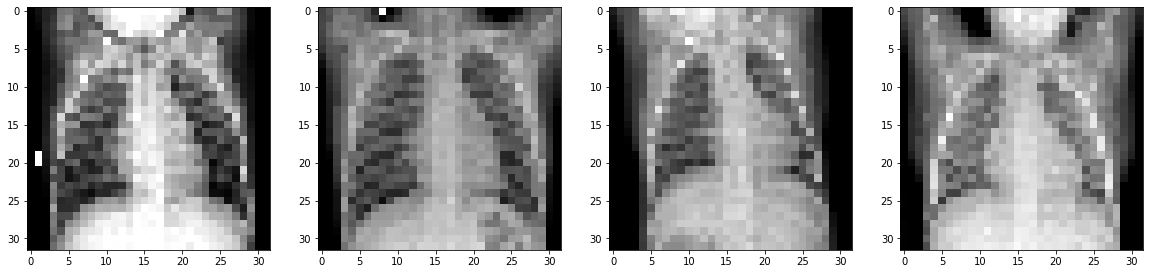

In [9]:
plt.figure(figsize=(20,5))
for i in list(range(4)):
    pic_index = normal_index[i]
    plt.subplot(1,4,i+1)
    plt.imshow(array_to_img(train_images[pic_index]))
plt.savefig("Normal Chest X-Ray Low Size", dpi=300)

Sample pictures of Pnuemonia X-rays.

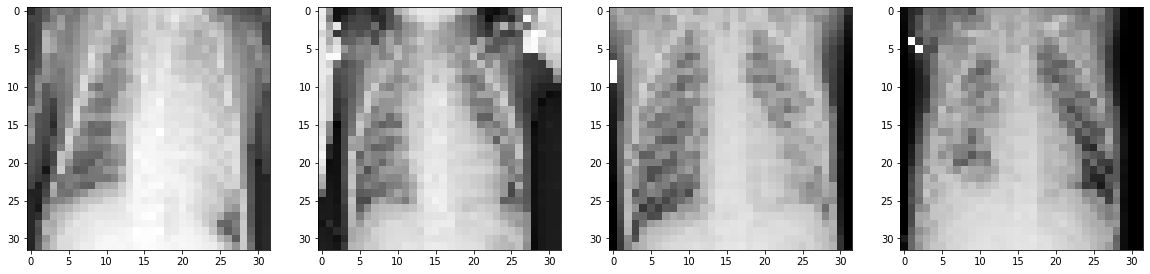

In [10]:
plt.figure(figsize=(20,5))
for i in list(range(4)):
    pic_index = pneumonia_index[i]
    plt.subplot(1,4,i+1)
    plt.imshow(array_to_img(train_images[pic_index]))
plt.savefig("Pneumonia Chest X-Ray Low Size", dpi=300)

In [11]:
def pics_disp_Normal(labels, images, num_pics=4, gray_scale=False, title=None, dpi=300):
    
    """ labels: array of labels
        images: array of images,
        num_pics: number of pictures to display default at 4
        gray_scale: default at False
        title: Title of image to be exported
        dpi: default at 300"""
    
    df = pd.DataFrame(labels, columns=['Normal', 'Pneumonia'])
    normal_df = df[df.Normal==1.0]
    normal_index = normal_df.index

    plt.figure(figsize=(5*num_pics,5))
    for i in list(range(num_pics)):
        pic_index = normal_index[i]
        plt.subplot(1,num_pics,i+1)
        if gray_scale:
            plt.imshow(array_to_img(images[pic_index]), cmap='gray')
        else:
            plt.imshow(array_to_img(images[pic_index]))
            
    plt.savefig(title, dpi=dpi)

In [12]:
def pics_disp_Pneumonia(labels, images, num_pics=4, gray_scale=False, title=None, dpi=300):
    """ labels: array of labels
        images: array of images,
        num_pics: number of pictures to display default at 4
        gray_scale: default at False
        title: Title of image to be exported
        dpi: default at 300"""
    df = pd.DataFrame(labels, columns=['Normal', 'Pneumonia'])
    pneumonia_df = df[df.Pneumonia == 1.0]
    pneumonia_index = pneumonia_df.index

    plt.figure(figsize=(5*num_pics,5))
    for i in list(range(num_pics)):
        pic_index = pneumonia_index[i]
        plt.subplot(1,num_pics,i+1)
        if gray_scale: plt.imshow(array_to_img(images[pic_index]), cmap='gray')
        else: plt.imshow(array_to_img(images[pic_index]))
    plt.savefig(title, dpi=dpi)

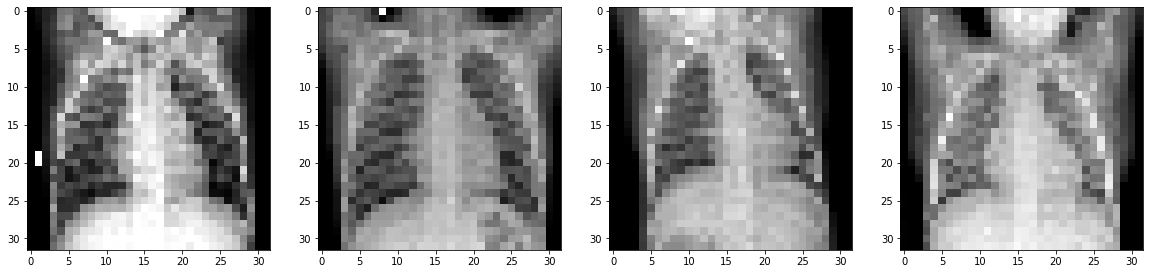

In [13]:
pics_disp_Normal(train_labels, train_images, title="test")

#### Reshape

In [14]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(1204, 3072)
(156, 3072)
(104, 3072)


In [15]:
train_y = np.reshape(train_labels[:,0], (train_img.shape[0],1))
test_y = np.reshape(test_labels[:,0], (test_img.shape[0],1))
val_y = np.reshape(val_labels[:,0], (val_img.shape[0],1))

#### Model Fitting

In [16]:
start_time=datetime.now()# To check how long each model run
random.seed(123)
basic_model = models.Sequential()
basic_model.add(layers.Dense(20, activation='relu', input_shape=(train_img.shape[1],))) #1st hidden layers
basic_model.add(layers.Dense(7, activation='relu'))#2nd hidden layers
basic_model.add(layers.Dense(5, activation='relu'))#3rd hidden layers
basic_model.add(layers.Dense(1, activation='sigmoid'))#output layer
basic_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
basic_history = basic_model.fit(train_img,
                    train_y,
                    epochs=150,
                    batch_size=32,
                    validation_data=(test_img, test_y))

Train on 1204 samples, validate on 156 samples
Epoch 1/150
1204/1204 [==============================] - 0s 370us/step - loss: 0.5866 - acc: 0.7434 - val_loss: 0.6573 - val_acc: 0.6538
Epoch 2/150
1204/1204 [==============================] - 0s 90us/step - loss: 0.5533 - acc: 0.7434 - val_loss: 0.6420 - val_acc: 0.6538
Epoch 3/150
1204/1204 [==============================] - 0s 107us/step - loss: 0.5363 - acc: 0.7434 - val_loss: 0.6143 - val_acc: 0.6538
Epoch 4/150
1204/1204 [==============================] - 0s 137us/step - loss: 0.5153 - acc: 0.7434 - val_loss: 0.6346 - val_acc: 0.6538
Epoch 5/150
1204/1204 [==============================] - 0s 153us/step - loss: 0.4873 - acc: 0.7434 - val_loss: 0.5737 - val_acc: 0.6538
Epoch 6/150
1204/1204 [==============================] - 0s 118us/step - loss: 0.4502 - acc: 0.7434 - val_loss: 0.5847 - val_acc: 0.6538
Epoch 7/150
1204/1204 [==============================] - 0s 116us/step - loss: 0.4142 - acc: 0.7434 - val_loss: 0.5049 - val_acc: 0.

1204/1204 [==============================] - 0s 104us/step - loss: 0.1399 - acc: 0.9601 - val_loss: 0.6824 - val_acc: 0.7885
Epoch 61/150
1204/1204 [==============================] - 0s 134us/step - loss: 0.1360 - acc: 0.9626 - val_loss: 0.4238 - val_acc: 0.8013
Epoch 62/150
1204/1204 [==============================] - 0s 115us/step - loss: 0.1323 - acc: 0.9610 - val_loss: 0.6238 - val_acc: 0.8205
Epoch 63/150
1204/1204 [==============================] - 0s 108us/step - loss: 0.1680 - acc: 0.9477 - val_loss: 0.5687 - val_acc: 0.8077
Epoch 64/150
1204/1204 [==============================] - 0s 145us/step - loss: 0.1557 - acc: 0.9460 - val_loss: 0.9176 - val_acc: 0.7564
Epoch 65/150
1204/1204 [==============================] - 0s 112us/step - loss: 0.1446 - acc: 0.9551 - val_loss: 0.7858 - val_acc: 0.7692
Epoch 66/150
1204/1204 [==============================] - 0s 119us/step - loss: 0.1325 - acc: 0.9576 - val_loss: 0.8740 - val_acc: 0.7692
Epoch 67/150
1204/1204 [=======================

1204/1204 [==============================] - 0s 111us/step - loss: 0.0979 - acc: 0.9635 - val_loss: 0.9620 - val_acc: 0.7821
Epoch 120/150
1204/1204 [==============================] - 0s 110us/step - loss: 0.0707 - acc: 0.9809 - val_loss: 1.2897 - val_acc: 0.7564
Epoch 121/150
1204/1204 [==============================] - 0s 111us/step - loss: 0.1319 - acc: 0.9502 - val_loss: 1.1291 - val_acc: 0.7756
Epoch 122/150
1204/1204 [==============================] - 0s 108us/step - loss: 0.0668 - acc: 0.9776 - val_loss: 1.5203 - val_acc: 0.7436
Epoch 123/150
1204/1204 [==============================] - 0s 114us/step - loss: 0.0810 - acc: 0.9693 - val_loss: 1.3824 - val_acc: 0.7564
Epoch 124/150
1204/1204 [==============================] - 0s 105us/step - loss: 0.1373 - acc: 0.9568 - val_loss: 1.6007 - val_acc: 0.7308
Epoch 125/150
1204/1204 [==============================] - 0s 131us/step - loss: 0.0640 - acc: 0.9792 - val_loss: 1.3277 - val_acc: 0.7564
Epoch 126/150
1204/1204 [================

#### Visualization

In [18]:
def training_results_Loss(results, title, dpi=200):
    """ results: the fitted model
        title: Title of the image to be saved
        dpi: default set at 300
        This function will generate Loss graph of fitted model using history and save pictures."""
    history = results.history
    plt.figure(figsize=(7,7))
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    plt.savefig(title, dpi=dpi)

In [19]:
def training_results_Accuracy(results, title, dpi=200):
        """ results: the fitted model
        title: Title of the image to be saved
        dpi: default set at 300
        This function will generate Accuracy graph of fitted model using history and save pictures."""
        history = results.history
        plt.figure(figsize=(7,7))
        plt.plot(history['val_acc'])
        plt.plot(history['acc'])
        plt.legend(['val_acc', 'acc'])
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.show()
        plt.savefig(title, dpi=dpi)

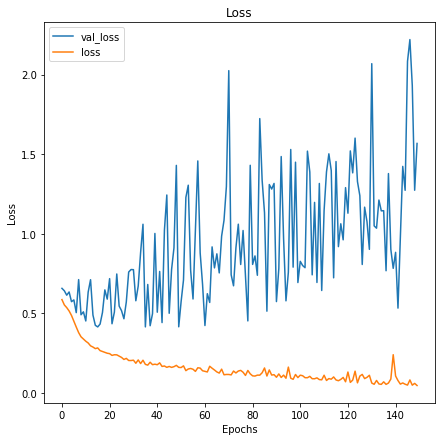

<Figure size 432x288 with 0 Axes>

In [20]:
training_results_Loss(basic_history, title="Basic_Model: Iteration of Loss Graph Train vs Val")

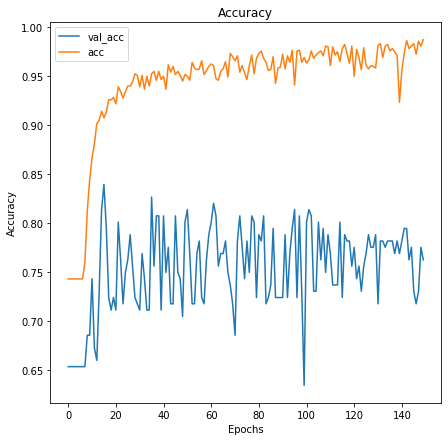

<Figure size 432x288 with 0 Axes>

In [21]:
training_results_Accuracy(basic_history, title="Basic_Model: Iteration of Accuracy Graph Train vs Val")

In [22]:
results_train = basic_model.evaluate(train_img, train_y)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3}')

print('----------')

results_test = basic_model.evaluate(val_img, val_y)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3}')

1204/1204 [==============================] - 0s 117us/step
Training Loss: 0.0392 
Training Accuracy: 0.989
----------
104/104 [==============================] - 0s 192us/step
Test Loss: 0.476 
Test Accuracy: 0.875


In [23]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-10-29 02:00:08.492589
End time 2020-10-29 02:00:31.097483
Time elapsed 0:00:22.604894


Wow! Tthat is a high accuracy for the test set. However, it seems like our model is overfitting and very unstable.

#### Result of the Basic Model - Confusion Matrix

In [24]:
print('Sum of the 0 class',sum(val_y==0))
print('Sum of the 1 class',sum(val_y==1))

Sum of the 0 class [57]
Sum of the 1 class [47]


Originally, 0 was Normal and 1 was Pnuemonia. However, due to reshaping of the data 0 is Pnuemonia and 1 is Normal.

In [25]:
def cm_df(data, index, columns):
    df = pd.DataFrame(data=data,index=index, columns=columns)
    return df

In [26]:
index=["Actual Pnuemonia", "Actual Normal"]
columns=["Predicted Pnuemonia", "Predicted Normal"]
basic_predictions = basic_model.predict_classes(val_img)
cm = confusion_matrix(val_y, basic_predictions, labels=[0,1],)
cm_df(cm, index, columns)

,Predicted Pnuemonia,Predicted Normal
Actual Pnuemonia,55,2
Actual Normal,11,36


In [27]:
def mse(model):
    val_loss = model.history['val_loss']
    loss = model.history['loss']
    acc = model.history['acc']
    val_acc = model.history['val_acc']
    print('MSE of Accuracy: ',mean_squared_error(val_acc, acc))
    print('MSE or Loss', mean_squared_error(val_loss, loss),'\n')

In [28]:
print('Basic Model Mean Squared Error')
mse(basic_history)

Basic Model Mean Squared Error
MSE of Accuracy:  0.03860832525428944
MSE or Loss 0.8008673551295832 



Our basic model predicted the test set at the accuracy of 87.5%. It actually turns out to be a great model, a very lucky case; however, it is very unstable model distance between train set accuracy and test set accuracy is a bit far which does not guarantee same accuarcy when model is ran multiple times. I will compare the model's stability through Mean Squared Error between train set and validation set of the model and show the progress of model improvement.

#### Example Images that Machine Failed to Detect Pneumonia

In [29]:
prediction_df = pd.DataFrame(basic_predictions, columns=['Prediction'])
val_y_df = pd.DataFrame(val_y.astype('int'), columns=['Actual'])
compared_df = pd.concat([prediction_df, val_y_df], axis=1)
compared_df.head(10)

,Prediction,Actual
0,0,1
1,0,0
2,0,0
3,0,1
4,1,1
5,1,1
6,1,1
7,0,0
8,0,1
9,0,0


In [30]:
compared_df['Result'] = basic_predictions == val_y.astype('int')

In [31]:
false_result_df = compared_df[compared_df.Result==False]
false_result_df.head()

,Prediction,Actual,Result
0,0,1,False
3,0,1,False
8,0,1,False
14,0,1,False
26,1,0,False


In [32]:
false_result_df[false_result_df.Prediction == 1]

,Prediction,Actual,Result
26,1,0,False
46,1,0,False


In [ ]:
failed_index=false_result_df[false_result_df.Prediction == 1].index

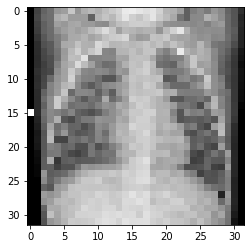

In [33]:
plt.imshow(array_to_img(val_images[failed_index[0]]));

In [34]:
def model_failed_Pneumonia(y_true, y_preds, images, num_pics=4, gray_scale=False, title=None, dpi=300):
    """ This function shows the images that the model failed to predict Pneumonia
        y_true: array of true labels
        y_preds: array of prediction labels
        images: array of images,
        num_pics: number of pictures to display default at 4
        gray_scale: default at False
        title: Title of image to be exported
        dpi: default at 300"""
    prediction_df = pd.DataFrame(y_preds.astype('int'), columns=['Prediction'])
    val_y_df = pd.DataFrame(y_true.astype('int'), columns=['Actual'])
    compared_df = pd.concat([prediction_df, val_y_df], axis=1)
    compared_df['Result'] = y_preds.astype('int') == y_true.astype('int')
    false_result_df = compared_df[compared_df.Result==False]
    failed_Pnuemonia_df = false_result_df[false_result_df.Prediction == 1]

    pneumonia_index = failed_Pnuemonia_df.index
    
    if len(pneumonia_index) < 4: 
        if len(failed_Pnuemonia_df)==0:
            return print("None Exist")
        else: num_pics=len(failed_Pnuemonia_df)
    
    plt.figure(figsize=(5*num_pics,5))
    for i in list(range(num_pics)):
        pic_index = pneumonia_index[i]
        plt.subplot(1,num_pics,i+1)
        if gray_scale: plt.imshow(array_to_img(images[pic_index]), cmap='gray')
        else: plt.imshow(array_to_img(images[pic_index]))
    plt.savefig(title, dpi=dpi)

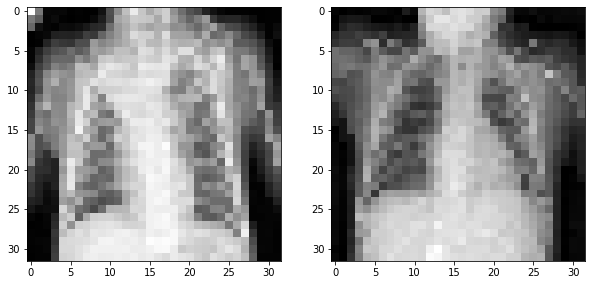

In [35]:
model_failed_Pneumonia(val_y, basic_predictions, val_images,
                       title='Basic Model failed Pneumonia Image Example')

### Tuned Model:

In [36]:
# Get all the data in the directory data/train (1204 images), normalize and reshape them
tuned_train_generator = ImageDataGenerator(rescale=1./255, #Normalization or array
                                     shear_range = 0.2, #shaering range or each image
                                     zoom_range = 0.2, #zoom range of each image
                                     horizontal_flip = True).flow_from_directory(
                                            train_data_dir, 
                                            target_size=(64, 64), #size of the image
                                            batch_size=1204, #number of images to train
                                            color_mode='grayscale')#grayscale to reduce the rgb calculation


# Get all the data in the directory data/validation (156 images), normalize and reshape them
tuned_test_generator = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True).flow_from_directory(
                                            test_data_dir, 
                                            target_size=(64, 64),
                                            batch_size=156,
                                            color_mode='grayscale')

# get all the data in the directory split/validation (104 images), normalize and reshape them
tuned_val_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True).flow_from_directory(
                                            val_data_dir,
                                            target_size=(64,64),
                                            batch_size=104,
                                            color_mode='grayscale')

# Create the datasets
tuned_train_images, tuned_train_labels = next(tuned_train_generator)
tuned_test_images, tuned_test_labels = next(tuned_test_generator)
tuned_val_images, tuned_val_labels = next(tuned_val_generator)

Found 4816 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


Here are the purpose of the parameters for the ImageDataGenerator.

1. Rescaling is performed to normalize the data for easier computation. <br>
2. Shearing range is applied because not all images will have same depth. It further gives adjustment to the for images to have similar depth level. <br>
3. Zoom range is applied because not all images will be taken from the same distance. It further gives adjustment to the images to have similar distance/zoom level. <br>
4. Horizontal_flip is applied for each images might have been applied mirror view. <br>

Here are the purpose of the parameters for flow_from_directory.
1. target_size is the size of the image in pixels.<br>
2. batch_size is the number of images to be be generated. <br>
3. color_mode is set to grayscale to redue the rgb calculation. <br>


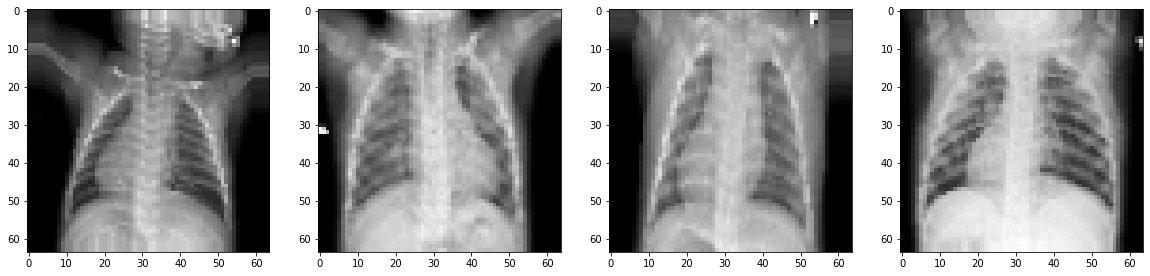

In [37]:
pics_disp_Normal(tuned_train_labels, tuned_train_images, gray_scale= True, title="Tuned Normal Chest X-Ray Pictures")

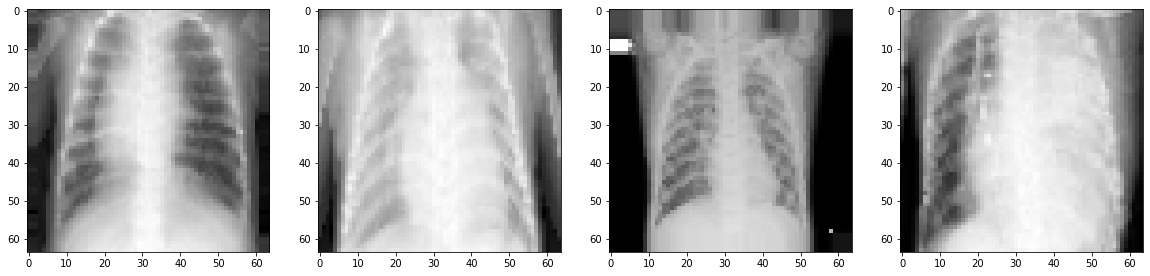

In [38]:
pics_disp_Pneumonia(tuned_train_labels, tuned_train_images, gray_scale=True, title="Tuned Pneumonia Chest X-Ray Pictures")

In [40]:
tuned_train_img = tuned_train_images.reshape(tuned_train_images.shape[0], -1)
tuned_test_img = tuned_test_images.reshape(tuned_test_images.shape[0], -1)
tuned_val_img = tuned_val_images.reshape(tuned_val_images.shape[0], -1)

tuned_train_y = np.reshape(tuned_train_labels[:,0], (tuned_train_img.shape[0],1))
tuned_test_y = np.reshape(tuned_test_labels[:,0], (tuned_test_img.shape[0],1))
tuned_val_y = np.reshape(tuned_val_labels[:,0], (tuned_val_img.shape[0],1))

In [41]:
# To check how long each model run
start_time=datetime.now()
random.seed(123)
tuned_model = models.Sequential()
tuned_model.add(layers.Dense(20, activation='relu', input_shape=(tuned_train_img.shape[1],))) #1st hidden layers
tuned_model.add(layers.Dropout(.3)) #Dropout layer to first layer
tuned_model.add(layers.Dense(7, activation='relu',kernel_regularizer = regularizers.l2(0.005)))#2nd hidden layers
tuned_model.add(layers.Dropout(.3))#Dropout layer to sencond layer
tuned_model.add(layers.Dense(5, activation='relu',kernel_regularizer = regularizers.l2(0.005)))#3rd hidden layers
tuned_model.add(layers.Dense(1, activation='sigmoid'))#output layer
tuned_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Dropout and regularizer is applied to avoid the overfitting fo the model. I would like to test different ratios for Dropout and coefficients for regularizer to further tuning the model.

In [42]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=30),
                  ModelCheckpoint(filepath='tuned_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True)]

By applying the early stopping, we can further avoid the overfitting the model. Now we will fit the model.

In [43]:
tuned_history = tuned_model.fit(tuned_train_img,
                    tuned_train_y,
                    epochs=150,
                    batch_size=32,
                    validation_data=(tuned_test_img, tuned_test_y),
                    callbacks=early_stopping)

Train on 1204 samples, validate on 156 samples
Epoch 1/150
1204/1204 [==============================] - 0s 394us/step - loss: 0.6793 - acc: 0.7409 - val_loss: 0.7375 - val_acc: 0.6410
Epoch 2/150
1204/1204 [==============================] - 0s 132us/step - loss: 0.6585 - acc: 0.7616 - val_loss: 0.7478 - val_acc: 0.6410
Epoch 3/150
1204/1204 [==============================] - 0s 140us/step - loss: 0.6327 - acc: 0.7650 - val_loss: 0.7260 - val_acc: 0.6410
Epoch 4/150
1204/1204 [==============================] - 0s 120us/step - loss: 0.6125 - acc: 0.7683 - val_loss: 0.6887 - val_acc: 0.6410
Epoch 5/150
1204/1204 [==============================] - 0s 125us/step - loss: 0.5969 - acc: 0.7666 - val_loss: 0.6861 - val_acc: 0.6410
Epoch 6/150
1204/1204 [==============================] - 0s 127us/step - loss: 0.5753 - acc: 0.7699 - val_loss: 0.6755 - val_acc: 0.6410
Epoch 7/150
1204/1204 [==============================] - 0s 126us/step - loss: 0.5719 - acc: 0.7674 - val_loss: 0.7155 - val_acc: 0

1204/1204 [==============================] - 0s 125us/step - loss: 0.3408 - acc: 0.8596 - val_loss: 0.6254 - val_acc: 0.7692
Epoch 61/150
1204/1204 [==============================] - 0s 130us/step - loss: 0.3468 - acc: 0.8663 - val_loss: 0.8302 - val_acc: 0.7179
Epoch 62/150
1204/1204 [==============================] - 0s 158us/step - loss: 0.3573 - acc: 0.8713 - val_loss: 0.4811 - val_acc: 0.8077
Epoch 63/150
1204/1204 [==============================] - 0s 137us/step - loss: 0.3394 - acc: 0.8746 - val_loss: 0.4672 - val_acc: 0.8654
Epoch 64/150
1204/1204 [==============================] - 0s 136us/step - loss: 0.3486 - acc: 0.8671 - val_loss: 0.5259 - val_acc: 0.7821
Epoch 65/150
1204/1204 [==============================] - 0s 138us/step - loss: 0.3446 - acc: 0.8762 - val_loss: 0.6237 - val_acc: 0.7692
Epoch 66/150
1204/1204 [==============================] - 0s 123us/step - loss: 0.3366 - acc: 0.8738 - val_loss: 0.4670 - val_acc: 0.8077
Epoch 67/150
1204/1204 [=======================

1204/1204 [==============================] - 0s 135us/step - loss: 0.2719 - acc: 0.8821 - val_loss: 0.4531 - val_acc: 0.8526
Epoch 120/150
1204/1204 [==============================] - 0s 144us/step - loss: 0.2781 - acc: 0.8904 - val_loss: 0.5701 - val_acc: 0.7756
Epoch 121/150
1204/1204 [==============================] - 0s 129us/step - loss: 0.2730 - acc: 0.8920 - val_loss: 0.5523 - val_acc: 0.7885
Epoch 122/150
1204/1204 [==============================] - 0s 134us/step - loss: 0.2761 - acc: 0.8879 - val_loss: 0.4431 - val_acc: 0.8205
Epoch 123/150
1204/1204 [==============================] - 0s 128us/step - loss: 0.2920 - acc: 0.8904 - val_loss: 0.4730 - val_acc: 0.7949
Epoch 124/150
1204/1204 [==============================] - 0s 136us/step - loss: 0.2775 - acc: 0.8787 - val_loss: 0.7533 - val_acc: 0.7692
Epoch 125/150
1204/1204 [==============================] - 0s 126us/step - loss: 0.2876 - acc: 0.8870 - val_loss: 0.4330 - val_acc: 0.8269
Epoch 126/150
1204/1204 [================

In [44]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-10-29 02:00:52.556564
End time 2020-10-29 02:01:15.143747
Time elapsed 0:00:22.587183


In [45]:
tuned_saved_model = load_model('tuned_model.h5')

In [46]:
tuned_results_train = tuned_saved_model.evaluate(tuned_train_img, tuned_train_y)
print(f'Training Loss: {tuned_results_train[0]:.3} \nTraining Accuracy: {tuned_results_train[1]:.3}')

print('----------')

tuned_results_test = tuned_saved_model.evaluate(tuned_val_img, tuned_val_y)
print(f'Test Loss: {tuned_results_test[0]:.3} \nTest Accuracy: {tuned_results_test[1]:.3}')

1204/1204 [==============================] - 0s 114us/step
Training Loss: 0.327 
Training Accuracy: 0.872
----------
104/104 [==============================] - 0s 96us/step
Test Loss: 0.408 
Test Accuracy: 0.827


Our train model and test model accuracy seems to be close and we were successfully generate the model that is not overfitted. Now is to find out how the confusion matrix to look like.

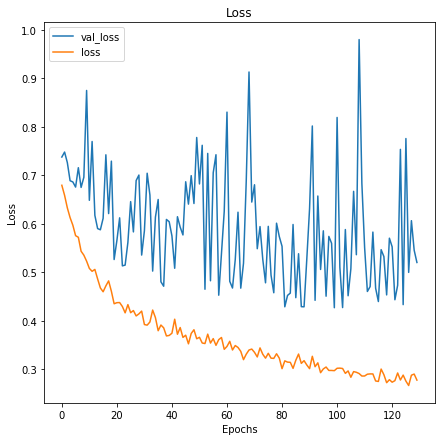

<Figure size 432x288 with 0 Axes>

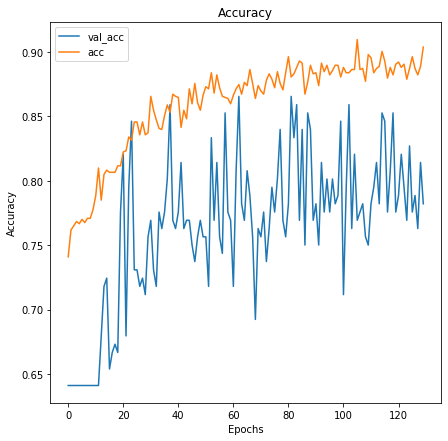

<Figure size 432x288 with 0 Axes>

In [47]:
training_results_Loss(tuned_history, title="Tuned_Model: Iteration of Loss Graph")
training_results_Accuracy(tuned_history, title="Tuned_Model: Iteration of Accuracy Graph")

In [48]:
index=["Actual Pnuemonia", "Actual Normal"]
columns=["Predicted Pnuemonia", "Predicted Normal"]
tuned_predictions = tuned_saved_model.predict_classes(tuned_val_img)
tuned_cm = confusion_matrix(tuned_val_y, tuned_predictions, labels=[0,1])
cm_df(tuned_cm, index, columns)

,Predicted Pnuemonia,Predicted Normal
Actual Pnuemonia,47,8
Actual Normal,10,39


In [49]:
print('Tuned Model Mean Squared Error')
mse(tuned_history)

Tuned Model Mean Squared Error
MSE of Accuracy:  0.010588483865826852
MSE or Loss 0.06383772308645436 



In overall, the test result has 82.7% accuracy which is lower than the initial model set. However, we can observe the improvement in the stability of the model and one step closer to the goal, not overfitting model. MSE of accuracy has brought down. In other words, when we increase the train data set, our model can perform even better.

Convolutional Neural Networks (CNN) is the next model to be built to see accuracy can be raised.

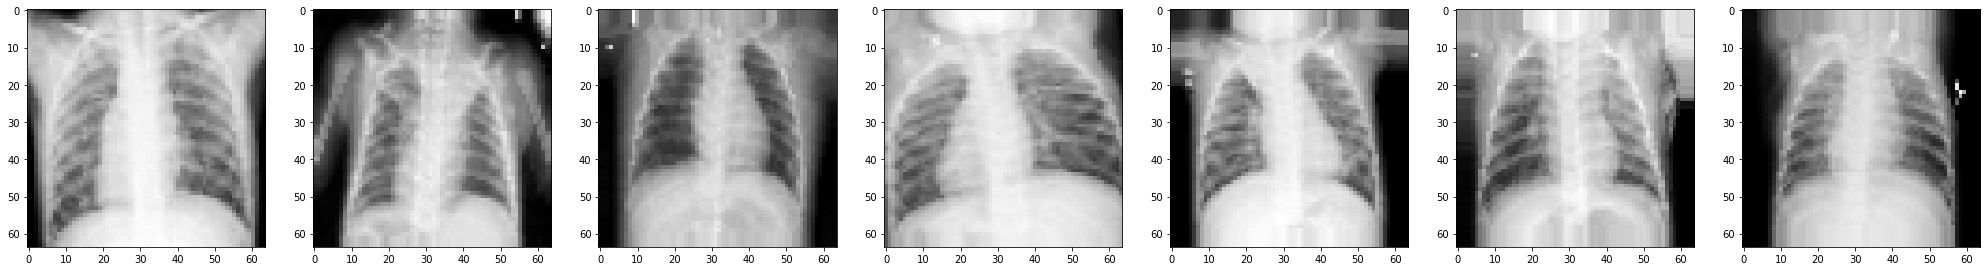

In [50]:
model_failed_Pneumonia(tuned_val_y, tuned_predictions, 
                       tuned_val_images, gray_scale=True, num_pics=7,
                       title='Tuned Model failed Pneumonia Image Example')

### Using CNN Method - CNN Model

Using the same Generator, we will not fit the CNN Model

In [54]:
start_time = datetime.now()
random.seed(123)
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 1)))#1st Hidden Layer
cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 1st Layer
cnn_model.add(layers.Dropout(.3)) #Dropout layer to 1st layer

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))#2nd Hidden Layer
cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 2nd Layer
cnn_model.add(layers.Dropout(.3)) #Dropout layer to 2nd layer

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer = regularizers.l2(0.005)))#3rd Hidden Layer
cnn_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 3rd Layer
cnn_model.add(layers.Dropout(.3)) #Dropout layer to 3rd layer

cnn_model.add(layers.Flatten()) #Flattening Layer
cnn_model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.005)))#4th Hidden Layer
cnn_model.add(layers.Dense(1, activation='sigmoid')) #Output Layer

cnn_model.compile(loss='binary_crossentropy',
              optimizer="adam", # For CNN model we will use 'adam' as an optimizer which is most commonly used optimizer
              metrics=['accuracy'])

cnn_early_stopping = [EarlyStopping(monitor='val_loss', patience=30),
                  ModelCheckpoint(filepath='cnn_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True)]

cnn_history = cnn_model.fit(tuned_train_images,
                    tuned_train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(tuned_test_images, tuned_test_y),
                    callbacks=cnn_early_stopping)

end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-10-29 02:01:19.814307
End time 2020-10-29 02:12:09.365501
Time elapsed 0:10:49.551194


In [90]:
cnn_saved_model = load_model('cnn_model.h5')

cnn_results_train = cnn_saved_model.evaluate(tuned_train_images, tuned_train_y)
print(f'Training Loss: {cnn_results_train[0]:.3} \nTraining Accuracy: {cnn_results_train[1]:.3}')

print('----------')

cnn_results_test = cnn_saved_model.evaluate(tuned_val_images, tuned_val_y)
print(f'Test Loss: {cnn_results_test[0]:.3} \nTest Accuracy: {cnn_results_test[1]:.3}')

1204/1204 [==============================] - 2s 2ms/step
Training Loss: 0.273 
Training Accuracy: 0.928
----------
104/104 [==============================] - 0s 2ms/step
Test Loss: 0.337 
Test Accuracy: 0.913


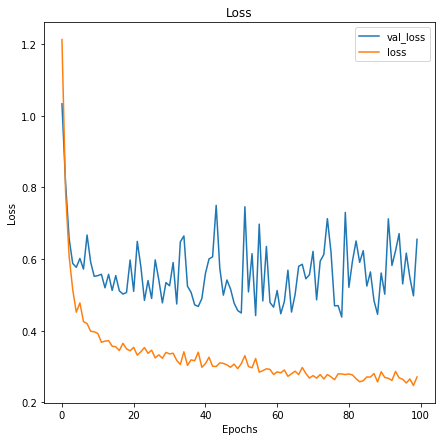

<Figure size 432x288 with 0 Axes>

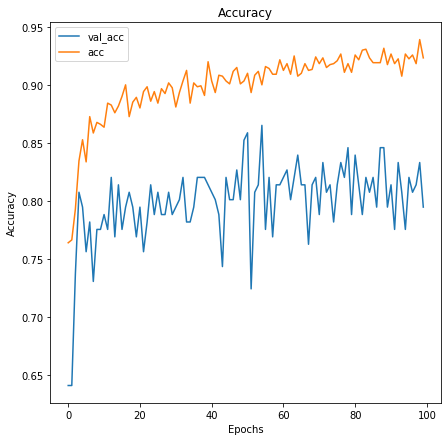

<Figure size 432x288 with 0 Axes>

In [57]:
training_results_Loss(cnn_history,title="CNN_Model: Iteration of Loss Graph")
training_results_Accuracy(cnn_history,title="CNN_Model: Iteration of Loss Graph")

In [58]:
index=["Actual Pnuemonia", "Actual Normal"]
columns=["Predicted Pnuemonia", "Predicted Normal"]
cnn_predictions = cnn_saved_model.predict_classes(tuned_val_images)
cnn_cm = confusion_matrix(tuned_val_y, cnn_predictions, labels=[0,1])
cm_df(cnn_cm, index, columns)

,Predicted Pnuemonia,Predicted Normal
Actual Pnuemonia,54,1
Actual Normal,8,41


In [59]:
print('CNN Model Mean Squared Error')
mse(cnn_history)

CNN Model Mean Squared Error
MSE of Accuracy:  0.010782517181076002
MSE or Loss 0.06515636686342173 



In overall, the test result has 91.3% accuracy which is lower than the initial and tuned model set. However, we can observe the improvement in the stability of the model. MSE of accuracy has brought down from the original model!

Next, I will try to build the model with higher pixel image to see higher accuracy can be achieved. 

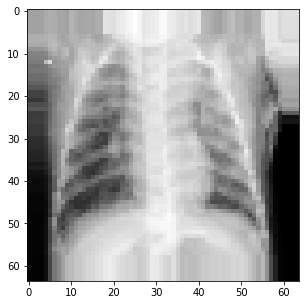

In [60]:
model_failed_Pneumonia(tuned_val_y, cnn_predictions, 
                       tuned_val_images, gray_scale=True,
                       title='CNN Model failed Pneumonia Image Example')

### Bigger Picture Shape - Importing Pictures Bigger Size

We will try it with bigger picture shape. Since more data brings better result, it would interesting to sizing up the picture could impact the data. 

In [61]:
# Get all the data in the directory data/train (1204 images), normalize and reshape them
bigger_train_generator = ImageDataGenerator(rescale=1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True).flow_from_directory(
                                            train_data_dir, 
                                            target_size=(128, 128),# Double the original picture size.
                                            batch_size=1204,
                                            color_mode='grayscale')

# Get all the data in the directory data/validation (156 images), normalize and reshape them
bigger_test_generator = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True).flow_from_directory(
                                            test_data_dir, 
                                            target_size=(128, 128),
                                            batch_size=156,
                                            color_mode='grayscale')

# get all the data in the directory split/validation (104 images), normalize and reshape them
bigger_val_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True).flow_from_directory(
                                            val_data_dir,
                                            target_size=(128,128),
                                            batch_size=104,
                                            color_mode='grayscale')

# Create the datasets
bigger_train_images, bigger_train_labels = next(bigger_train_generator)
bigger_test_images, bigger_test_labels = next(bigger_test_generator)
bigger_val_images, bigger_val_labels = next(bigger_val_generator)

Found 4816 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


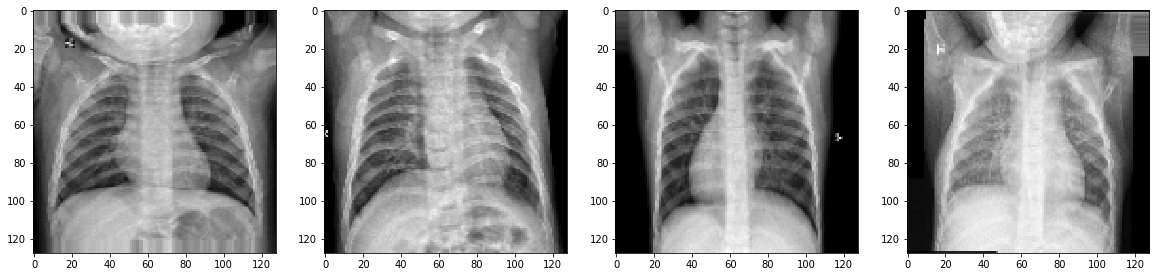

In [62]:
pics_disp_Normal(bigger_train_labels, bigger_train_images, 
                 gray_scale=True, title="Bigger Normal Chest X-Ray Pictures")

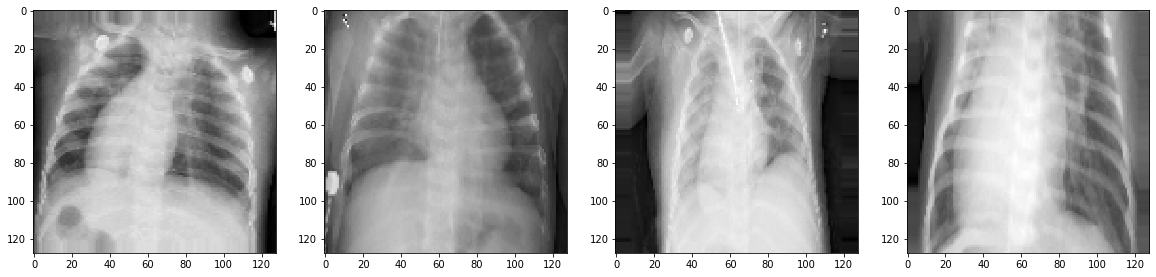

In [63]:
pics_disp_Pneumonia(bigger_train_labels, bigger_train_images,  
                    gray_scale=True, title="Bigger Pneumonia Chest X-Ray Pictures")

In [64]:
bigger_train_img = train_images.reshape(bigger_train_images.shape[0], -1)
bigger_test_img = test_images.reshape(bigger_test_images.shape[0], -1)
bigger_val_img = val_images.reshape(bigger_val_images.shape[0], -1)
bigger_train_y = np.reshape(bigger_train_labels[:,0], (bigger_train_img.shape[0],1))
bigger_test_y = np.reshape(bigger_test_labels[:,0], (bigger_test_img.shape[0],1))
bigger_val_y = np.reshape(bigger_val_labels[:,0], (bigger_val_img.shape[0],1))

In [65]:
random.seed(123)
start_time=datetime.now()
bigger_model = models.Sequential()
bigger_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
bigger_model.add(layers.MaxPooling2D((2, 2)))
bigger_model.add(layers.Dropout(.3)) #Dropout layer to First layer

bigger_model.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer = regularizers.l2(0.005)))
bigger_model.add(layers.MaxPooling2D((2, 2)))
bigger_model.add(layers.Dropout(.3)) #Dropout layer to Second layer

bigger_model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.l2(0.005)))
bigger_model.add(layers.MaxPooling2D((2, 2)))
bigger_model.add(layers.Dropout(.3)) #Dropout layer to Third layer

bigger_model.add(layers.Flatten())
bigger_model.add(layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(0.005)))
bigger_model.add(layers.Dense(1, activation='sigmoid'))

bigger_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['acc'])

In [66]:
bigger_early_stopping = [EarlyStopping(monitor='val_loss', patience=30),
                  ModelCheckpoint(filepath='bigger_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True)]

In [67]:
bigger_history = bigger_model.fit(bigger_train_images,
                    bigger_train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(bigger_test_images, bigger_test_y),
                    callbacks=bigger_early_stopping)

Train on 1204 samples, validate on 156 samples
Epoch 1/100
1204/1204 [==============================] - 28s 23ms/step - loss: 1.1583 - acc: 0.7641 - val_loss: 1.0247 - val_acc: 0.6090
Epoch 2/100
1204/1204 [==============================] - 31s 26ms/step - loss: 0.7135 - acc: 0.7973 - val_loss: 0.7482 - val_acc: 0.7436
Epoch 3/100
1204/1204 [==============================] - 25s 20ms/step - loss: 0.5101 - acc: 0.8513 - val_loss: 0.6519 - val_acc: 0.7308
Epoch 4/100
1204/1204 [==============================] - 25s 20ms/step - loss: 0.4472 - acc: 0.8771 - val_loss: 0.7068 - val_acc: 0.7051
Epoch 5/100
1204/1204 [==============================] - 25s 21ms/step - loss: 0.3990 - acc: 0.8912 - val_loss: 0.6122 - val_acc: 0.7564
Epoch 6/100
1204/1204 [==============================] - 25s 20ms/step - loss: 0.3873 - acc: 0.8796 - val_loss: 0.5912 - val_acc: 0.7756
Epoch 7/100
1204/1204 [==============================] - 25s 21ms/step - loss: 0.3654 - acc: 0.8929 - val_loss: 0.6122 - val_acc: 0

1204/1204 [==============================] - 28s 23ms/step - loss: 0.2160 - acc: 0.9435 - val_loss: 0.6803 - val_acc: 0.7949
Epoch 61/100
1204/1204 [==============================] - 28s 23ms/step - loss: 0.2228 - acc: 0.9394 - val_loss: 0.6718 - val_acc: 0.7821
Epoch 62/100
1204/1204 [==============================] - 25s 20ms/step - loss: 0.2231 - acc: 0.9385 - val_loss: 0.5102 - val_acc: 0.8205
Epoch 63/100
1204/1204 [==============================] - 25s 21ms/step - loss: 0.2266 - acc: 0.9427 - val_loss: 0.5343 - val_acc: 0.8013
Epoch 64/100
1204/1204 [==============================] - 26s 21ms/step - loss: 0.2189 - acc: 0.9419 - val_loss: 0.4660 - val_acc: 0.8462
Epoch 65/100
1204/1204 [==============================] - 25s 21ms/step - loss: 0.2463 - acc: 0.9286 - val_loss: 0.4889 - val_acc: 0.8141
Epoch 66/100
1204/1204 [==============================] - 24s 20ms/step - loss: 0.2215 - acc: 0.9435 - val_loss: 0.5556 - val_acc: 0.7692
Epoch 67/100
1204/1204 [=======================

In [68]:
end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)


Start time 2020-10-29 02:12:38.899663
End time 2020-10-29 02:50:17.806334
Time elapsed 0:37:38.906671


In [69]:
bigger_saved_model = load_model('bigger_model.h5')

In [70]:
bigger_results_train = bigger_saved_model.evaluate(bigger_train_images, bigger_train_y)
print(f'Training Loss: {bigger_results_train[0]:.3} \nTraining Accuracy: {bigger_results_train[1]:.3}')

print('----------')

bigger_results_test = bigger_saved_model.evaluate(bigger_val_images, bigger_val_y)
print(f'Test Loss: {bigger_results_test[0]:.3} \nTest Accuracy: {bigger_results_test[1]:.3}')

1204/1204 [==============================] - 8s 6ms/step
Training Loss: 0.278 
Training Accuracy: 0.924
----------
104/104 [==============================] - 1s 7ms/step
Test Loss: 0.35 
Test Accuracy: 0.885


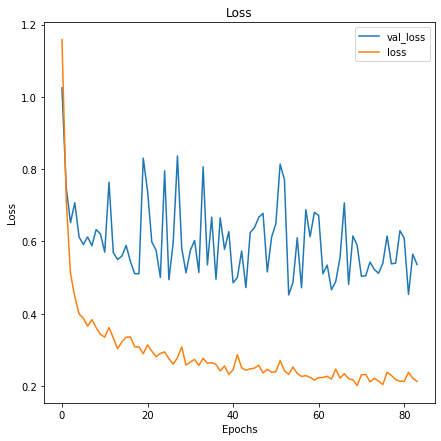

<Figure size 432x288 with 0 Axes>

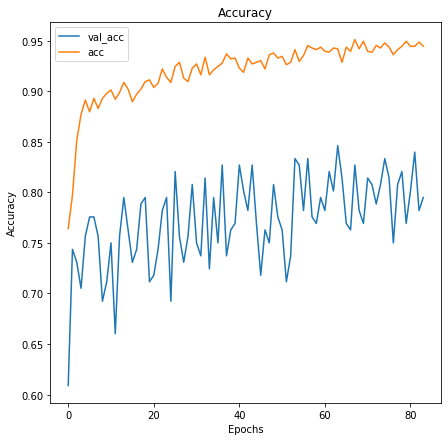

<Figure size 432x288 with 0 Axes>

In [71]:
training_results_Loss(bigger_history,title="Bigger_Model: Iteration of Loss Graph")
training_results_Accuracy(bigger_history,title="Bigger_Model: Iteration of Loss Graph")

In [72]:
index=["Actual Pnuemonia", "Actual Normal"]
columns=["Predicted Pnuemonia", "Predicted Normal"]
bigger_predictions = bigger_saved_model.predict_classes(bigger_val_images)
cm = confusion_matrix(bigger_val_y, bigger_predictions, labels=[0,1])
cm_df(cm, index, columns)

,Predicted Pnuemonia,Predicted Normal
Actual Pnuemonia,42,3
Actual Normal,9,50


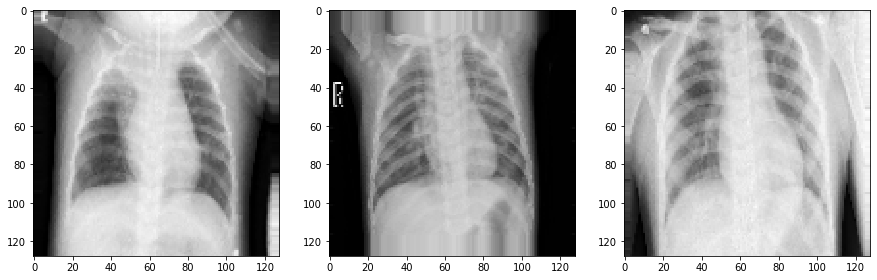

In [73]:
model_failed_Pneumonia(bigger_val_y, bigger_predictions, 
                       bigger_val_images, gray_scale=True,
                       title='Bigger Model failed Pneumonia Image Example')

In [74]:
print('Basic Model Mean Squared Error')
mse(basic_history)
print('Tuned Model Mean Squared Error')
mse(tuned_history)
print('CNN Model Mean Squared Error')
mse(cnn_history)
print('Bigger Model Mean Squared Error')
mse(bigger_history)

Basic Model Mean Squared Error
MSE of Accuracy:  0.03860832525428944
MSE or Loss 0.8008673551295832 

Tuned Model Mean Squared Error
MSE of Accuracy:  0.010588483865826852
MSE or Loss 0.06383772308645436 

CNN Model Mean Squared Error
MSE of Accuracy:  0.010782517181076002
MSE or Loss 0.06515636686342173 

Bigger Model Mean Squared Error
MSE of Accuracy:  0.023176568575807417
MSE or Loss 0.1110471746397706 



### Final Model

With given results and cost of the model, I have chose the the CNN Model for the Final Model. Since more data brings the better result. I will use all my images for the final model.

In [83]:
# Get all the data in the directory data/train (4816 images), normalize and reshape them
final_train_generator = ImageDataGenerator(rescale=1./255,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True).flow_from_directory(
                                            train_data_dir, 
                                            target_size=(64, 64),# Double the original picture size.
                                            batch_size=4816,
                                            color_mode='grayscale')

# Get all the data in the directory data/validation (624 images), normalize and reshape them
final_test_generator = ImageDataGenerator(rescale=1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True).flow_from_directory(
                                            test_data_dir, 
                                            target_size=(64, 64),
                                            batch_size=624,
                                            color_mode='grayscale')

# get all the data in the directory split/validation (416 images), normalize and reshape them
final_val_generator = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True).flow_from_directory(
                                            val_data_dir,
                                            target_size=(64,64),
                                            batch_size=416,
                                            color_mode='grayscale')

# Create the datasets
final_train_images, final_train_labels = next(final_train_generator)
final_test_images, final_test_labels = next(final_test_generator)
final_val_images, final_val_labels = next(final_val_generator)

final_train_img = final_train_images.reshape(final_train_images.shape[0], -1)
final_test_img = final_test_images.reshape(final_test_images.shape[0], -1)
final_val_img = final_val_images.reshape(final_val_images.shape[0], -1)

final_train_y = np.reshape(final_train_labels[:,0], (final_train_img.shape[0],1))
final_test_y = np.reshape(final_test_labels[:,0], (final_test_img.shape[0],1))
final_val_y = np.reshape(final_val_labels[:,0], (final_val_img.shape[0],1))

start_time = datetime.now()
random.seed(123)
final_model = models.Sequential()
final_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64, 64, 1)))#1st Hidden Layer
final_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 1st Layer
final_model.add(layers.Dropout(.3)) #Dropout layer to 1st layer

final_model.add(layers.Conv2D(32, (3, 3), activation='relu',
                              kernel_regularizer = regularizers.l2(0.005)))#2nd Hidden Layer
final_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 2nd Layer
final_model.add(layers.Dropout(.3)) #Dropout layer to 2nd layer

final_model.add(layers.Conv2D(64, (3, 3), activation='relu',
                              kernel_regularizer = regularizers.l2(0.005)))#3rd Hidden Layer
final_model.add(layers.MaxPooling2D((2, 2))) #Maxpooling to 3rd Layer
final_model.add(layers.Dropout(.3)) #Dropout layer to 3rd layer

final_model.add(layers.Flatten()) #Flattening Layer
final_model.add(layers.Dense(64, activation='relu',
                             kernel_regularizer = regularizers.l2(0.005)))#4th Hidden Layer
final_model.add(layers.Dense(1, activation='sigmoid')) #Output Layer

final_model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
final_early_stopping = [EarlyStopping(monitor='val_loss', patience=30),
                  ModelCheckpoint(filepath='final_model.h5',
                                 monitor='val_loss',
                                 save_best_only=True)]
final_history = final_model.fit(final_train_images,
                    final_train_y,
                    epochs=100,
                    batch_size=32,
                    validation_data=(final_test_images, final_test_y),
                    callbacks=final_early_stopping)

end_time = datetime.now()

print('\nStart time', start_time)
print('End time', end_time)
print('Time elapsed', end_time - start_time)

Found 4816 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 416 images belonging to 2 classes.
Train on 4816 samples, validate on 624 samples
Epoch 1/100
4816/4816 [==============================] - 34s 7ms/step - loss: 0.7823 - acc: 0.7747 - val_loss: 0.6157 - val_acc: 0.7260
Epoch 2/100
4816/4816 [==============================] - 31s 7ms/step - loss: 0.4135 - acc: 0.8586 - val_loss: 0.5314 - val_acc: 0.8013
Epoch 3/100
4816/4816 [==============================] - 29s 6ms/step - loss: 0.3689 - acc: 0.8823 - val_loss: 0.5083 - val_acc: 0.8029
Epoch 4/100
4816/4816 [==============================] - 32s 7ms/step - loss: 0.3577 - acc: 0.8835 - val_loss: 0.5503 - val_acc: 0.7804
Epoch 5/100
4816/4816 [==============================] - 28s 6ms/step - loss: 0.3481 - acc: 0.8839 - val_loss: 0.5887 - val_acc: 0.7644
Epoch 6/100
4816/4816 [==============================] - 30s 6ms/step - loss: 0.3546 - acc: 0.8785 - val_loss: 0.5161 - val_acc: 0.7933
Epoch 7/100
4

4816/4816 [==============================] - 23s 5ms/step - loss: 0.2212 - acc: 0.9336 - val_loss: 0.7896 - val_acc: 0.7308
Epoch 60/100
4816/4816 [==============================] - 23s 5ms/step - loss: 0.2209 - acc: 0.9381 - val_loss: 0.4779 - val_acc: 0.8349
Epoch 61/100
4816/4816 [==============================] - 23s 5ms/step - loss: 0.2222 - acc: 0.9381 - val_loss: 0.6768 - val_acc: 0.7580
Epoch 62/100
4816/4816 [==============================] - 24s 5ms/step - loss: 0.2155 - acc: 0.9375 - val_loss: 0.8113 - val_acc: 0.7372
Epoch 63/100
4816/4816 [==============================] - 24s 5ms/step - loss: 0.2211 - acc: 0.9377 - val_loss: 0.5028 - val_acc: 0.8125
Epoch 64/100
4816/4816 [==============================] - 24s 5ms/step - loss: 0.2247 - acc: 0.9338 - val_loss: 0.6514 - val_acc: 0.7740
Epoch 65/100
4816/4816 [==============================] - 23s 5ms/step - loss: 0.2206 - acc: 0.9344 - val_loss: 0.6731 - val_acc: 0.7804
Epoch 66/100
4816/4816 [==============================

In [84]:
final_saved_model = load_model('final_model.h5')

final_results_train = final_saved_model.evaluate(final_train_images, final_train_y)
print(f'Training Loss: {final_results_train[0]:.3} \nTraining Accuracy: {final_results_train[1]:.3}')

print('----------')

final_results_test = final_saved_model.evaluate(final_val_images, final_val_y)
print(f'Test Loss: {final_results_test[0]:.3} \nTest Accuracy: {final_results_test[1]:.3}')

4816/4816 [==============================] - 7s 1ms/step
Training Loss: 0.248 
Training Accuracy: 0.927
----------
416/416 [==============================] - 1s 2ms/step
Test Loss: 0.24 
Test Accuracy: 0.93


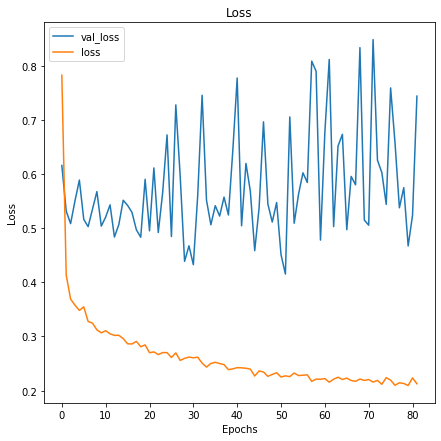

<Figure size 432x288 with 0 Axes>

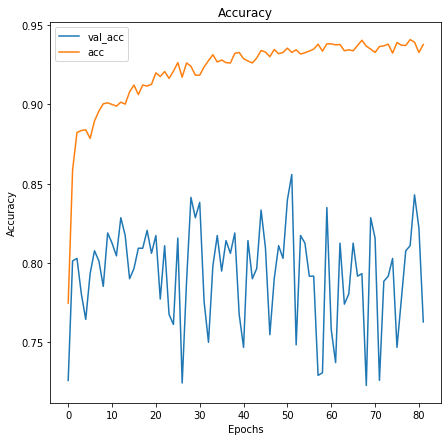

<Figure size 432x288 with 0 Axes>

In [85]:
training_results_Loss(final_history,title="Final_Model: Iteration of Loss Graph")
training_results_Accuracy(final_history,title="Final_Model: Iteration of Loss Graph")

In [87]:
index=["Actual Pnuemonia", "Actual Normal"]
columns=["Predicted Pnuemonia", "Predicted Normal"]
final_predictions = cnn_saved_model.predict_classes(final_val_images)
final_cm = confusion_matrix(final_val_y, final_predictions, labels=[0,1])
cm_df(final_cm, index, columns)

,Predicted Pnuemonia,Predicted Normal
Actual Pnuemonia,205,3
Actual Normal,32,176


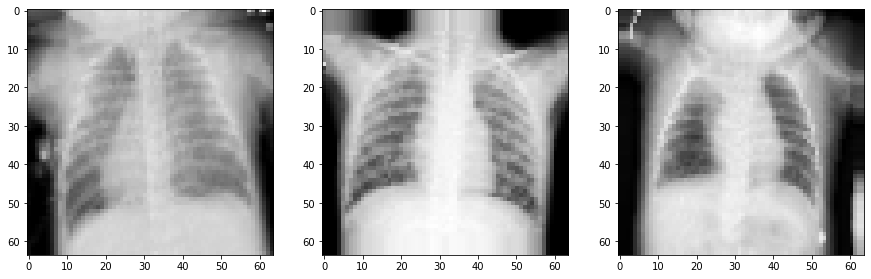

In [88]:
model_failed_Pneumonia(final_val_y, final_predictions, 
                       final_val_images, gray_scale=True,
                       title='Final Model failed Pneumonia Image Example')

## Class Binary CNN - Future Work

In [ ]:
# start_time = datetime.now()
# np.random.seed(123)

# # Get all the data in the directory data/train (5216 images), normalize and reshape them
# cnn_bin_train_generator = ImageDataGenerator(rescale=1./255,
#                                      shear_range = 0.2,
#                                      zoom_range = 0.2,
#                                      horizontal_flip = True).flow_from_directory(
#                                             train_data_dir, 
#                                             target_size=(64, 64),
#                                             batch_size=5216,
#                                             class_mode='binary',
#                                             color_mode='grayscale')

# # Get all the data in the directory data/validation (624 images), normalize and reshape them
# cnn_bin_test_generator = ImageDataGenerator(rescale=1./255,
#                                     shear_range = 0.2,
#                                     zoom_range = 0.2,
#                                     horizontal_flip = True).flow_from_directory(
#                                             test_data_dir, 
#                                             target_size=(64, 64),
#                                             batch_size=624,
#                                             class_mode='binary',
#                                             color_mode='grayscale')

# # get all the data in the directory split/validation (16 images), normalize and reshape them
# cnn_bin_val_generator = ImageDataGenerator(rescale=1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True).flow_from_directory(
#                                             val_data_dir,
#                                             target_size=(64,64),
#                                             batch_size=32,
#                                             class_mode='binary',
#                                             color_mode='grayscale')

In [76]:
# np.random.seed(123)
# cnn_bin_model = models.Sequential()
# cnn_bin_model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(64, 64,  1)))
# cnn_bin_model.add(layers.MaxPooling2D((2, 2)))

# cnn_bin_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# cnn_bin_model.add(layers.MaxPooling2D((2, 2)))

# cnn_bin_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# cnn_bin_model.add(layers.MaxPooling2D((2, 2)))

# cnn_bin_model.add(layers.Flatten())
# cnn_bin_model.add(layers.Dense(64, activation='relu'))
# cnn_bin_model.add(layers.Dense(1, activation='sigmoid'))

# cnn_bin_model.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['acc'])

In [77]:
# cnn_bin_model_gen = cnn_bin_model.fit_generator(cnn_bin_train_generator,
#                          steps_per_epoch = 100,
#                          epochs = 1,
#                          validation_data = cnn_bin_val_generator,
#                          validation_steps = 624)

In [78]:
# cnn_bin_test_accu = cnn_bin_model.evaluate_generator(cnn_bin_test_generator,steps=624)

In [79]:
# cnn_bin_test_accu

In [80]:
# predictions = cnn_bin_model.predict_generator(cnn_bin_test_generator)
# predictions[predictions <= 0.5] = 0
# predictions[predictions > 0.5] = 1

In [81]:
# index=["Actual Normal", "Actual Pneumonia"]
# columns=["Predicted Normal", "Predicted Pneumonia"]
# cm=confusion_matrix(cnn_bin_test_generator.classes, predictions, labels=[0, 1])
# cm_df(cm, index, columns)

In [82]:
# end_time = datetime.now()

# print('\nStart time', start_time)
# print('End time', end_time)
# print('Time elapsed', end_time - start_time)

# Conclusion

In conclusion, I was successfully able to build the deep machine learning model of Image Classifier through Neural Networks.


Convolutional Neural Network (CNN) is the final model used and I was able to bring 93% of model accuracy. 

On the other hand, the model performed at 98.6% in predicting Pnuemonia patient.

For the focus of the economy, the model predicted 8.4% of the normal people to be tested for the Pnuemonia.

Diagnostic expense vs. Treatment expense

Per BMC Health Services Research's 2018 article, ["Trends in healthcare utilization and costs associated with pneumonia in the United States during 2008–2014"](https://bmchealthservres.biomedcentral.com/articles/10.1186/s12913-018-3529-4), the mean of Diagnostic expense was \\$429.1 (\\$424.8 – \\$433.4) and the mean treatment expense is \\$1,126.9 (\\$1,119.5 – \\$1,134.3) for emergency department/urgent care visits, and \\$10,962.5 (\\$10,822.8 – \\$11,102.2) for hospitalization in years 2008 - 2014.

Based on research, treatment expense is about 28 times more expense than the diagnostic expense.

By successful prediction of patients with given Chest X-ray image, number of hospitalization will be reduced and simple treatment can be done which will save many \\$$$.

Future Work)

1) I would like to research other existing Neural Networks models.<br>
2) By using cloud and other services, I would like to test the model with bigger data set and other parameters to find further results.<br>
3) Find out more about how model failed to predict certain images.